 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [ ]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [ ]:
# Count nulls
whale_returns.isnull().sum()
# whale_returns[whale_returns.isnull().any(axis = 1)]

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [ ]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [ ]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [ ]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [ ]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [ ]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [ ]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

/var/folders/_5/xbbs75ys77g5_8d18brvz__r0000gn/T/ipykernel_11688/3274215289.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [ ]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [ ]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [ ]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([sp500_daily_returns,algo_returns,whale_returns],join='inner',axis='columns')
df

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

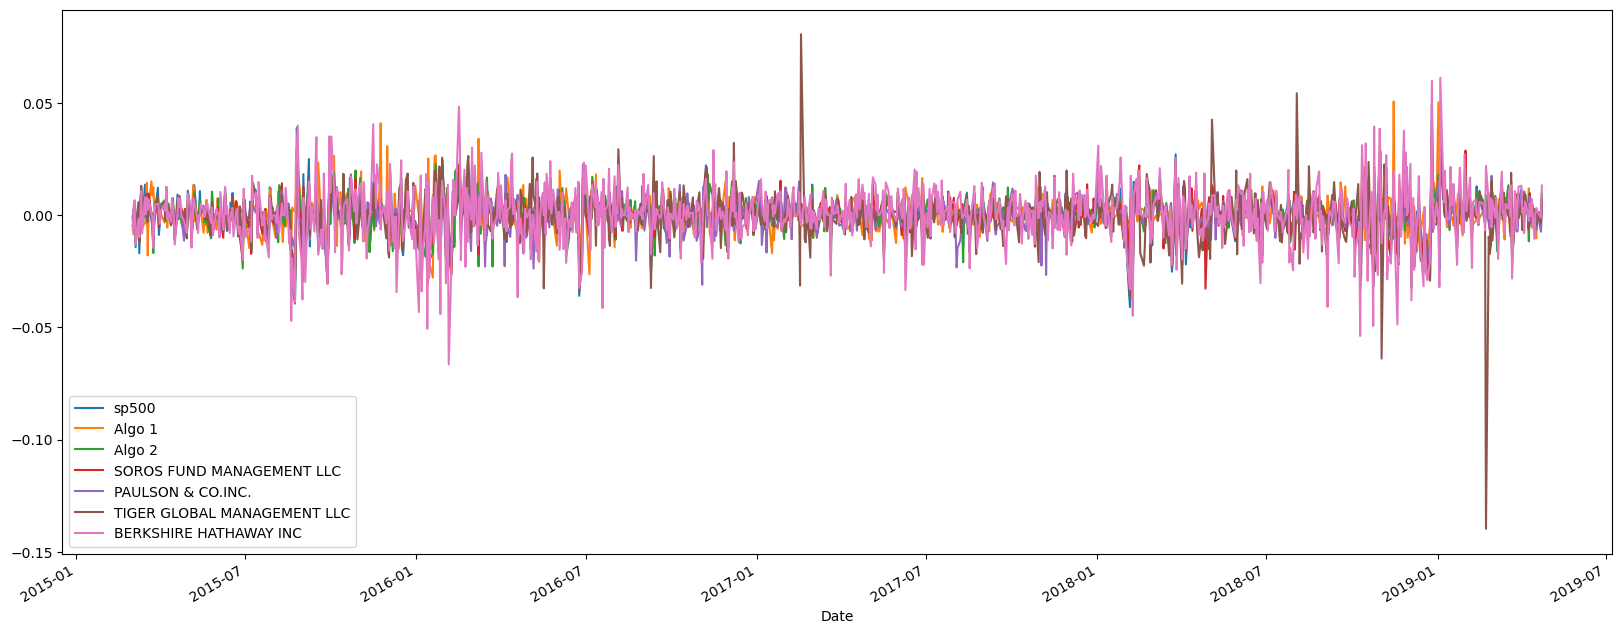

In [ ]:
# Plot daily returns of all portf
df.plot(figsize=(20,8))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

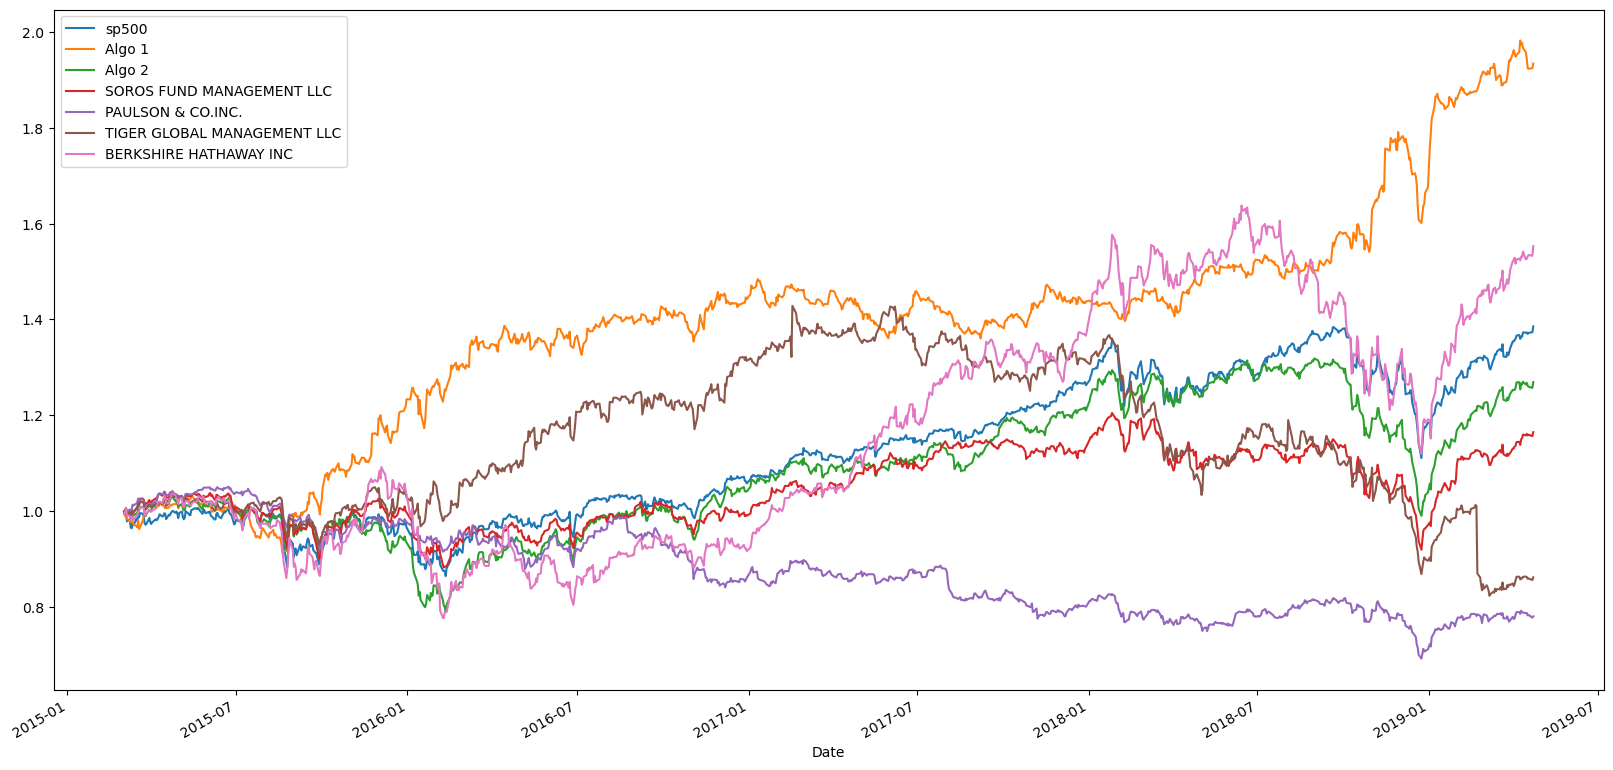

In [ ]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

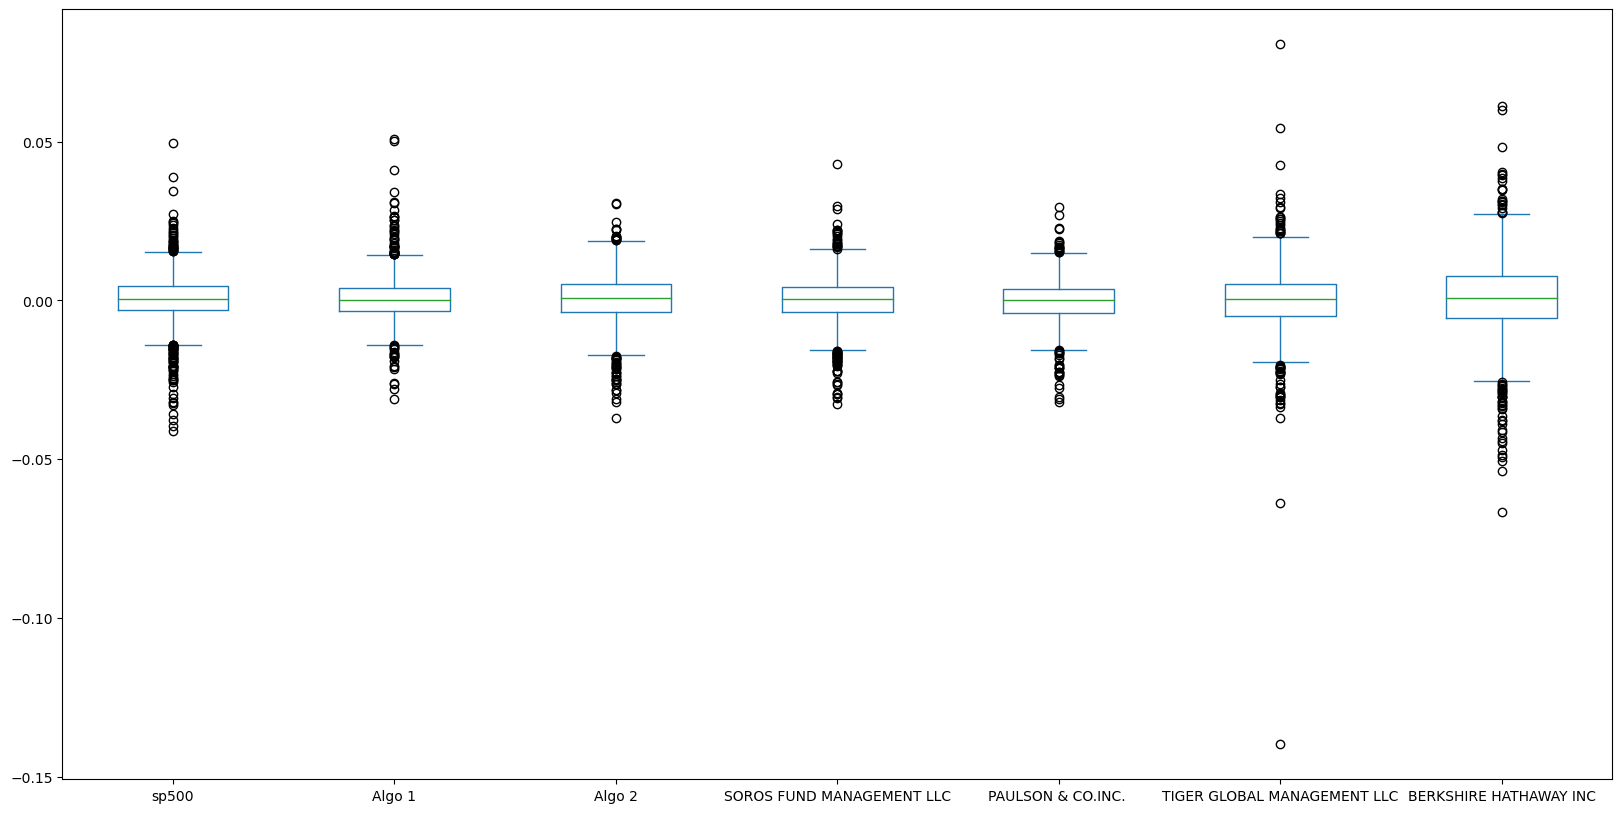

In [ ]:
# Box plot to visually show risk
df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
df.std()

sp500                          0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [ ]:
df.std() > df['sp500'].std()

sp500                          False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [ ]:
# Calculate  the daily standard deviation of S&P 500
sp_dly_std = sp500_daily_returns.std()
sp_dly_std
# Determine which portfolios are riskier than the S&P 500
all_portfolios = pd.concat([algo_returns, whale_returns], axis="columns",  join="inner") 
all_portfolios
dly_std_all_port = all_portfolios.std().sort_values(ascending=False)
dly_std_all_port

BERKSHIRE HATHAWAY INC         0.012892
TIGER GLOBAL MANAGEMENT LLC    0.010876
Algo 2                         0.008327
SOROS FUND MANAGEMENT LLC      0.007879
Algo 1                         0.007601
PAULSON & CO.INC.              0.007010
dtype: float64

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = df.std() * np.sqrt(252)
annual_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
sp500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

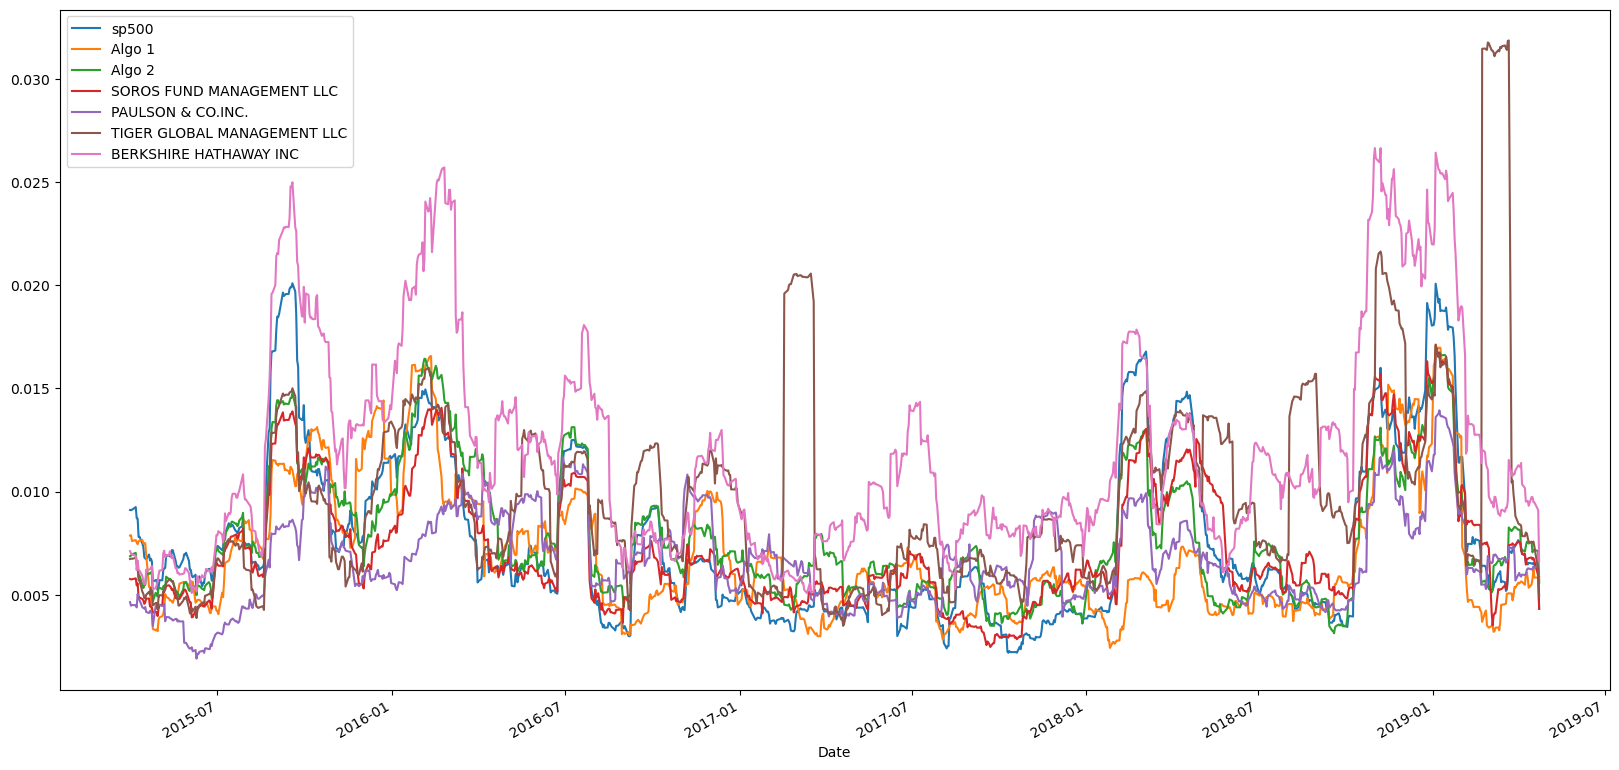

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_rolling = df.rolling(window=21).std()
# Plot the rolling standard deviation
df_rolling.plot(figsize=(20,10)) 

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
df_corr = df.corr()

# Display de correlation matrix
df_corr.style.background_gradient(cmap='summer')

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
sp500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

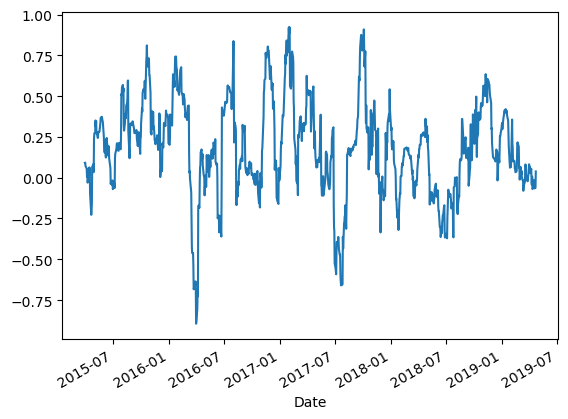

In [ ]:
# Calculate covariance of a single portfolio
df['Algo 1'].cov(df['sp500'])
algo_covariance = df['Algo 1'].rolling(window=21).cov(df['sp500'])

# Calculate variance of S&P 500
df['sp500'].var() 
sp500_var = df['sp500'].rolling(window=21).var() 
# Computing beta
algo_covariance / sp500_var 
beta_algo_vs_sp500 = algo_covariance / sp500_var 
# Plot beta trend
beta_algo_vs_sp500
beta_algo_vs_sp500.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
df.ewm(halflife=21).std()
ewm_df = df.ewm(halflife=21).std()
ewm_df.head()

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.000106,0.004700,0.002380,0.002472,0.005814,0.001441,0.007624
2015-03-05,0.003294,0.004162,0.002662,0.002677,0.004968,0.002478,0.007020
2015-03-06,0.006498,0.003419,0.007166,0.005349,0.004615,0.004665,0.009387
2015-03-09,0.007083,0.002999,0.006290,0.004638,0.004471,0.005496,0.008066


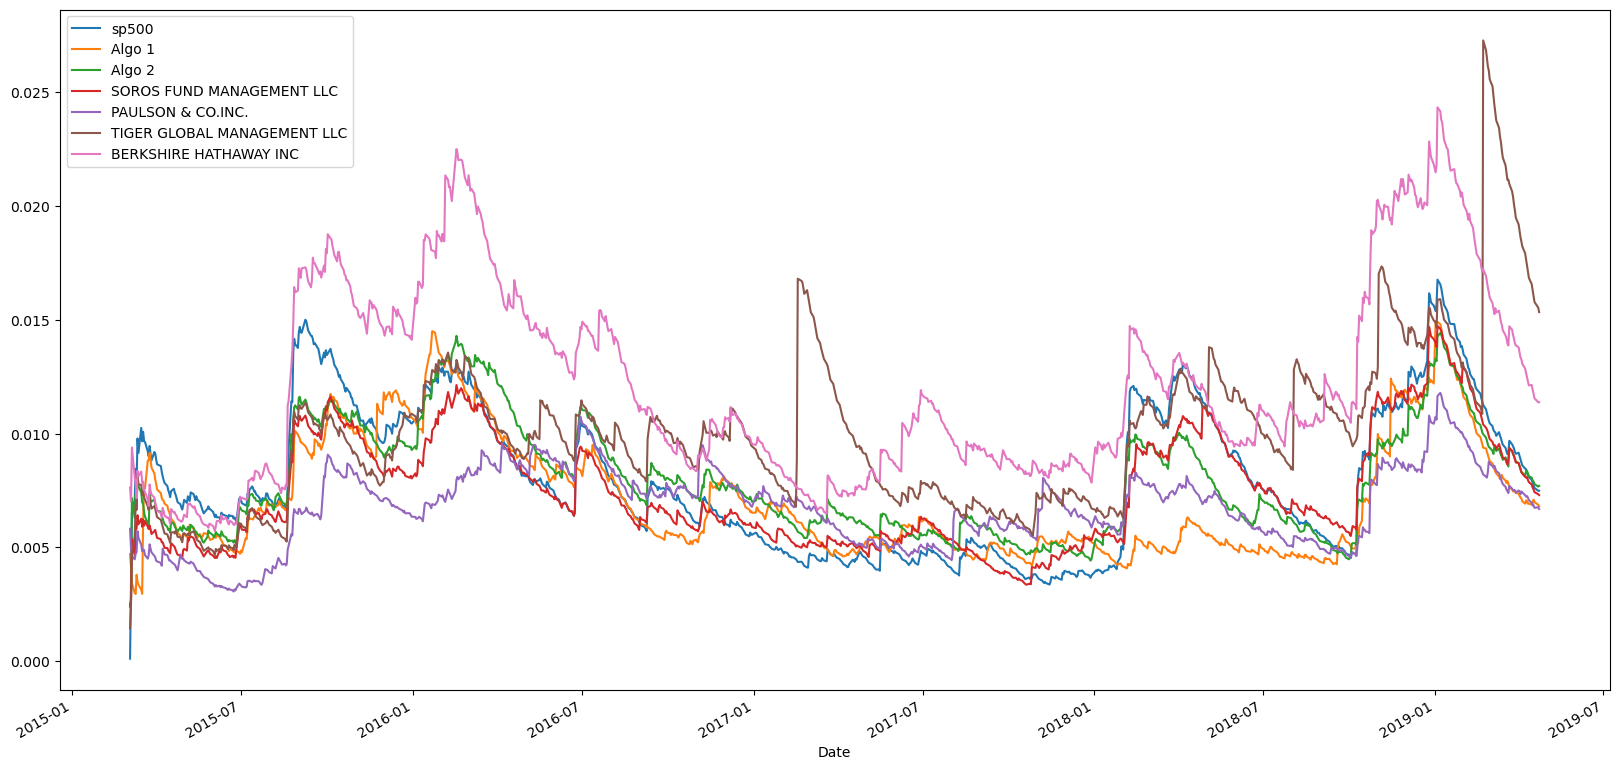

In [ ]:
ewm_df.plot(figsize=(20,10));

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
(df.mean() * 252) / (df.std() * np.sqrt(252))
annualized_sharpe_ratio = (df.mean() * 252) / (df.std() * np.sqrt(252))


<Axes: >

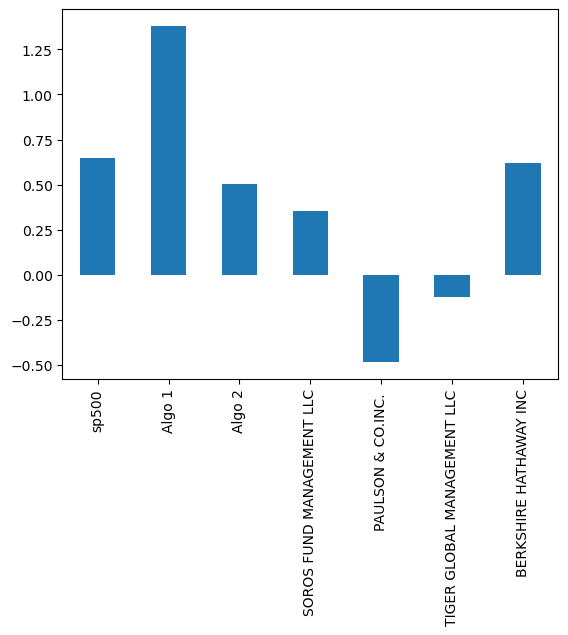

In [ ]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
import yfinance as yf
import datetime as dt

In [ ]:
df_yf = yf.Tickers(['NVDA','TSLA','META','AAPL','MSFT'])

In [ ]:
cumulative_returns.index[0] , cumulative_returns.index[-1]

(Timestamp('2015-03-03 00:00:00'), Timestamp('2019-04-23 00:00:00'))

In [ ]:
df5 = df_yf.history(start=dt.datetime(2015,3,3),end=dt.datetime(2019,4,23))

[*********************100%***********************]  5 of 5 completed


In [ ]:
df5.head()

Close                                            Dividends  \
                 AAPL       META       MSFT      NVDA       TSLA      AAPL   
Date                                                                         
2015-03-03  29.101406  79.599998  37.785137  5.346383  13.304000       0.0   
2015-03-04  28.916935  80.900002  37.593071  5.406643  13.496000       0.0   
2015-03-05  28.437765  81.209999  37.636730  5.510293  13.375333       0.0   
2015-03-06  28.480505  80.010002  36.981949  5.435570  12.925333       0.0   
2015-03-09  28.601990  79.440002  37.409733  5.450032  12.725333       0.0   

                                ... Stock Splits                      \
           META MSFT NVDA TSLA  ...         AAPL META MSFT NVDA TSLA   
Date                            ...                                    
2015-03-03  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0  0.0   
2015-03-04  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0  0.0   
2015-03-05  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0  0.0   
2015-03-06  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0  0.0   
2015-03-09  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0  0.0   

               Volume                                           
                 AAPL      META      MSFT      NVDA       TSLA  
Date                                                            
2015-03-03  151265200  18635000  31748600  16034400   66484500  
2015-03-04  126665200  28126700  25748700  22684000   63330000  
2015-03-05  226068400  27825700  23193500  32305600   73155000  
2015-03-06  291368400  24488600  36248800  25739200  100686000  
2015-03-09  354114000  18925100  32108000  22238800  101050500  

[5 rows x 35 columns]

In [ ]:
df_close = df5[[('Close', 'AAPL'),
            ('Close', 'META'),
            ('Close', 'MSFT'),
            ( 'Close', 'NVDA'),
            ('Close', 'TSLA'),]]

In [ ]:
df_close.head()

Close                                           
                 AAPL       META       MSFT      NVDA       TSLA
Date                                                            
2015-03-03  29.101406  79.599998  37.785137  5.346383  13.304000
2015-03-04  28.916935  80.900002  37.593071  5.406643  13.496000
2015-03-05  28.437765  81.209999  37.636730  5.510293  13.375333
2015-03-06  28.480505  80.010002  36.981949  5.435570  12.925333
2015-03-09  28.601990  79.440002  37.409733  5.450032  12.725333

In [ ]:
df_close.columns = df_close.columns.get_level_values(1)
df_close.head()

,AAPL,META,MSFT,NVDA,TSLA
Date,,,,,
2015-03-03,29.101406,79.599998,37.785137,5.346383,13.304000
2015-03-04,28.916935,80.900002,37.593071,5.406643,13.496000
2015-03-05,28.437765,81.209999,37.636730,5.510293,13.375333
2015-03-06,28.480505,80.010002,36.981949,5.435570,12.925333
2015-03-09,28.601990,79.440002,37.409733,5.450032,12.725333


In [ ]:
# Calculate daily returns
df_returns = df_close.pct_change()
# Drop NAs
df_returns.dropna(inplace=True)
# Display sample data
df_returns.head(5)

,AAPL,META,MSFT,NVDA,TSLA
Date,,,,,
2015-03-04,-0.006339,0.016332,-0.005083,0.011271,0.014432
2015-03-05,-0.016571,0.003832,0.001161,0.019171,-0.008941
2015-03-06,0.001503,-0.014776,-0.017397,-0.013561,-0.033644
2015-03-09,0.004266,-0.007124,0.011567,0.002661,-0.015473
2015-03-10,-0.020686,-0.023792,-0.019136,0.017249,-0.002934


In [ ]:
type(df_returns)

pandas.core.frame.DataFrame

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/5, 1/5, 1/5,1/5,1/5]

# Calculate portfolio return
my_portfolio = df_returns.dot(weights)
# Display sample data
my_portfolio.head()

Date
2015-03-04    0.006123
2015-03-05   -0.000270
2015-03-06   -0.015575
2015-03-09   -0.000821
2015-03-10   -0.009860
dtype: float64

In [ ]:
my_returns = (1+my_portfolio).cumprod()

<Axes: xlabel='Date'>

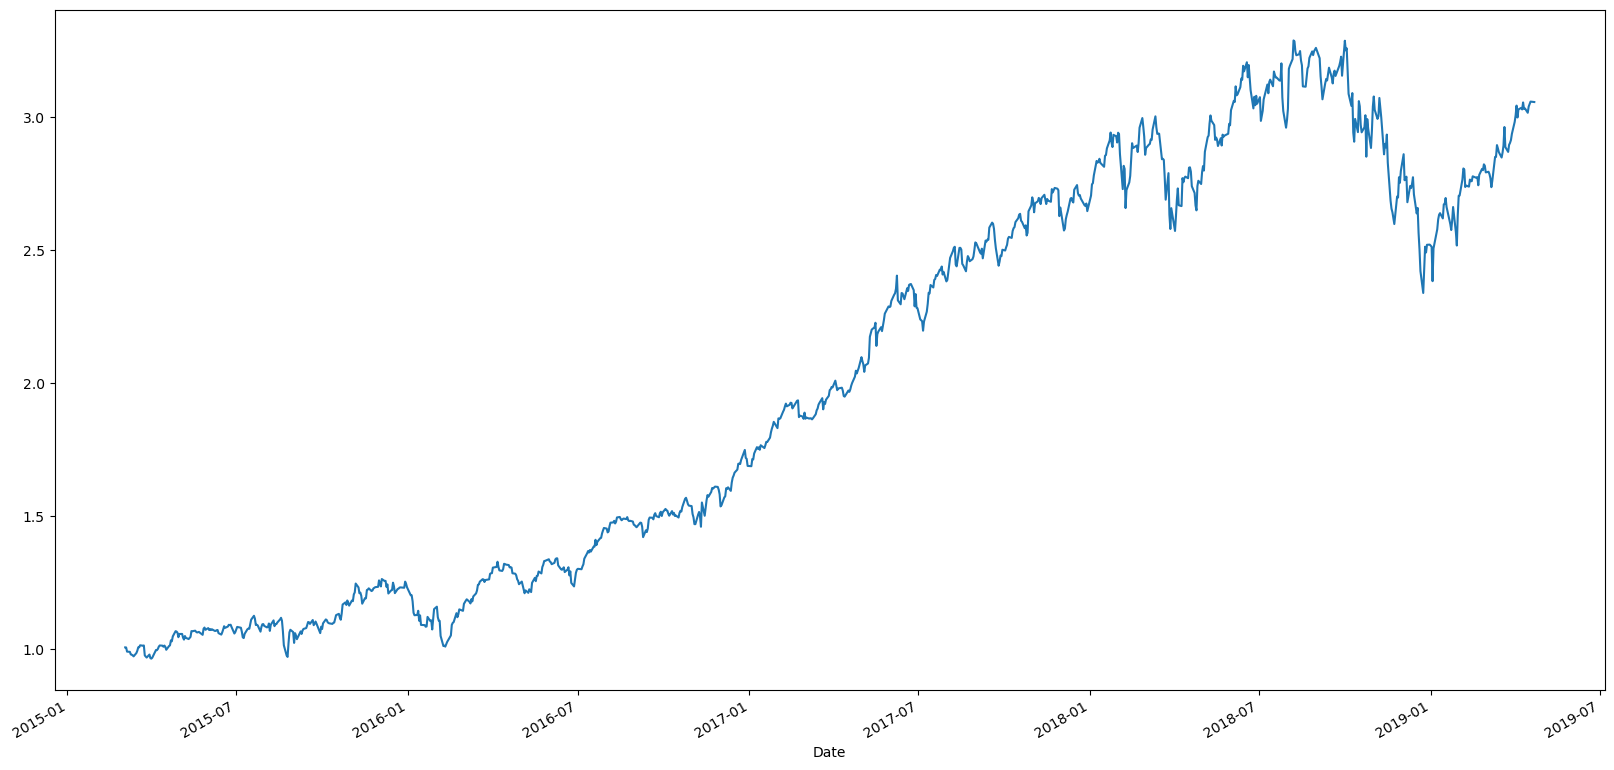

In [ ]:
my_returns.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
all_returns = pd.concat([cumulative_returns,my_returns],axis =1,join='inner')
all_returns.head()

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,0
Date,,,,,,,,
2015-03-04,0.991093,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617,1.006123
2015-03-05,0.992278,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327,1.005851
2015-03-06,0.978214,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172,0.990185
2015-03-09,0.982072,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534,0.989372
2015-03-10,0.965415,0.976921,0.983462,0.987379,0.997595,0.984595,0.979897,0.979617


In [ ]:
all_returns = all_returns.rename(columns={0:'bryant_fund'})

In [ ]:
all_returns.head()

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,bryant_fund
Date,,,,,,,,
2015-03-04,0.991093,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617,1.006123
2015-03-05,0.992278,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327,1.005851
2015-03-06,0.978214,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172,0.990185
2015-03-09,0.982072,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534,0.989372
2015-03-10,0.965415,0.976921,0.983462,0.987379,0.997595,0.984595,0.979897,0.979617


<Axes: xlabel='Date'>

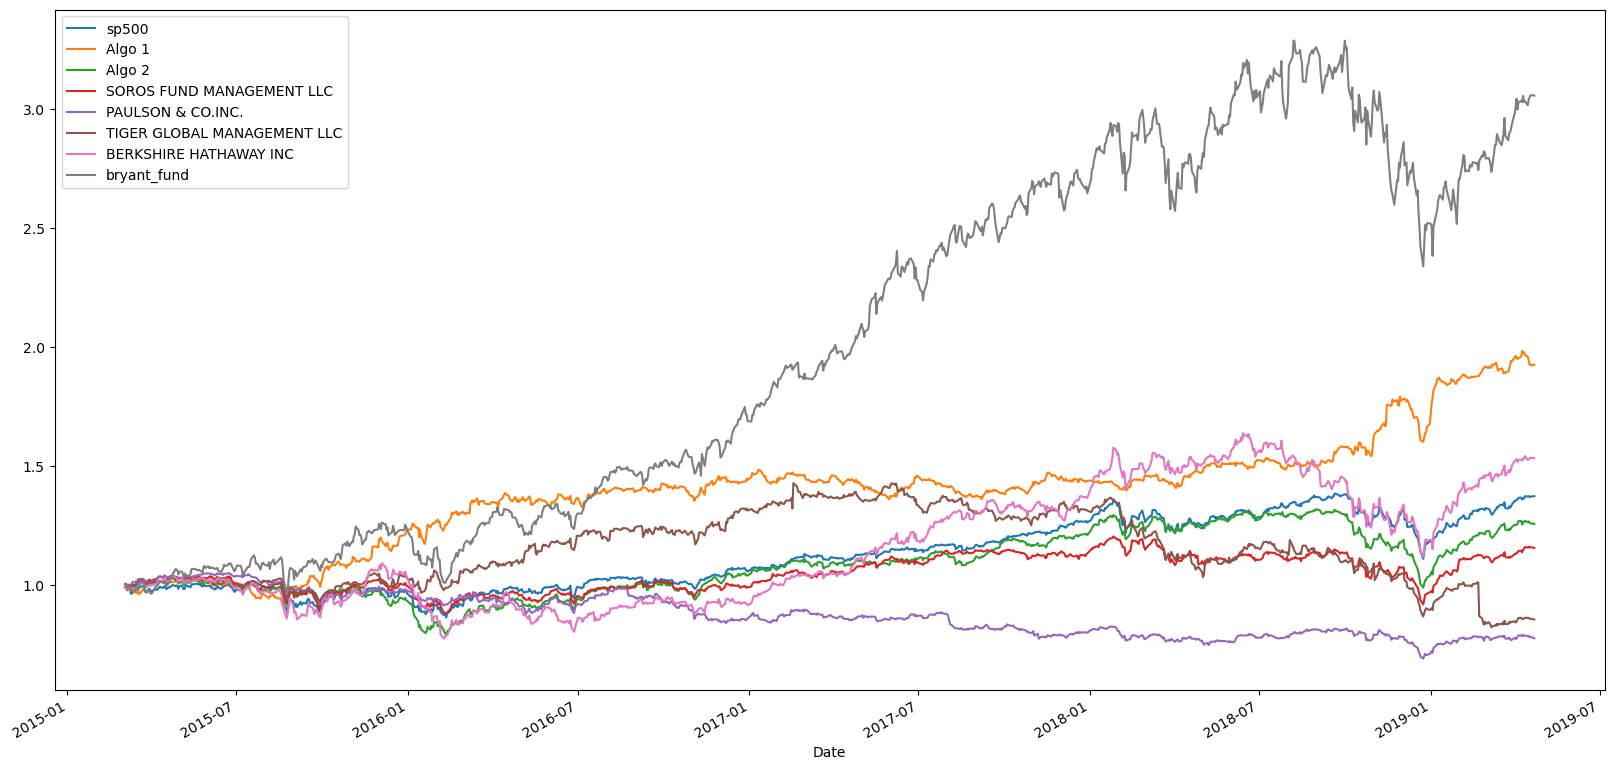

In [ ]:
all_returns.plot(figsize=(20,10))

In [ ]:
type(df),type(df_returns)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
df_ret = pd.concat([df,my_portfolio],axis=1,join='inner')
df_ret =df_ret.rename(columns={0:'bryant_fund'})
df_ret.head()

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,bryant_fund
Date,,,,,,,,
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,0.006123
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,-0.000270
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.015575
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.000821
2015-03-10,-0.016961,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739,-0.009860


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
df_ret.std()

sp500                          0.008557
Algo 1                         0.007626
Algo 2                         0.008345
SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
bryant_fund                    0.014750
dtype: float64

### Calculate and plot rolling `std` with 21-day window

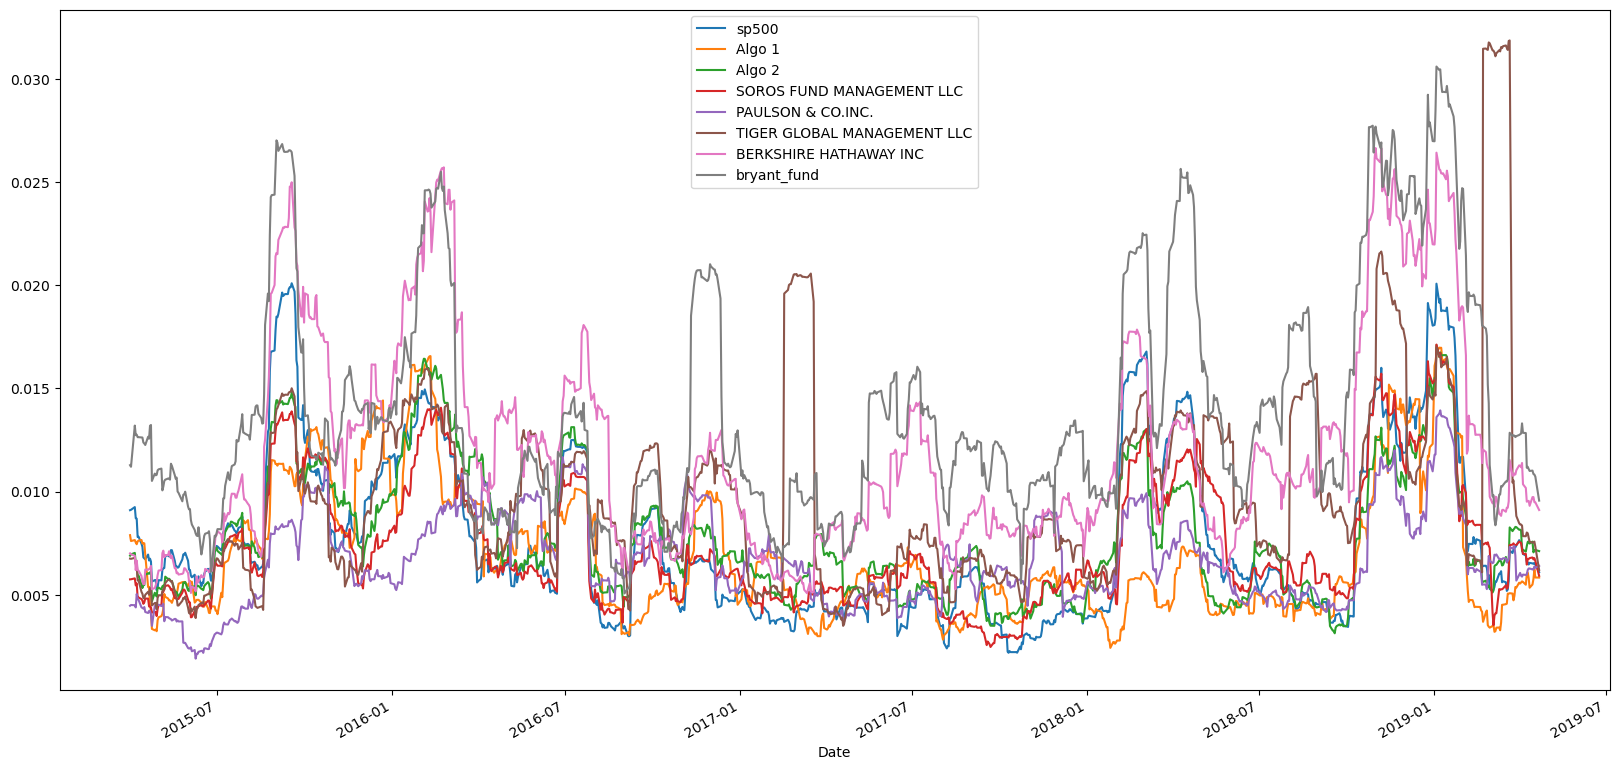

In [ ]:
# Calculate rolling standard deviation
df_ret.std()
# Plot rolling standard deviation
df_ret.rolling(window=21).std().plot(figsize=(20,10));

In [ ]:
all_annualized = df_ret.std()*np.sqrt(252)
all_annualized

sp500                          0.135831
Algo 1                         0.121058
Algo 2                         0.132475
SOROS FUND MANAGEMENT LLC      0.125406
PAULSON & CO.INC.              0.111556
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
bryant_fund                    0.234147
dtype: float64

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
df_ret.corr().style.background_gradient(cmap='winter')

,sp500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,bryant_fund
sp500,1.000000,0.279002,0.858683,0.837776,0.669517,0.623853,0.751062,0.762042
Algo 1,0.279002,1.000000,0.287823,0.320864,0.268483,0.164111,0.291557,0.223790
Algo 2,0.858683,0.287823,1.000000,0.826726,0.678147,0.507161,0.687785,0.651932
SOROS FUND MANAGEMENT LLC,0.837776,0.320864,0.826726,1.000000,0.699870,0.561043,0.754182,0.674659
PAULSON & CO.INC.,0.669517,0.268483,0.678147,0.699870,1.000000,0.434380,0.545294,0.495343
TIGER GLOBAL MANAGEMENT LLC,0.623853,0.164111,0.507161,0.561043,0.434380,1.000000,0.424166,0.451310
BERKSHIRE HATHAWAY INC,0.751062,0.291557,0.687785,0.754182,0.545294,0.424166,1.000000,0.728086
bryant_fund,0.762042,0.223790,0.651932,0.674659,0.495343,0.451310,0.728086,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

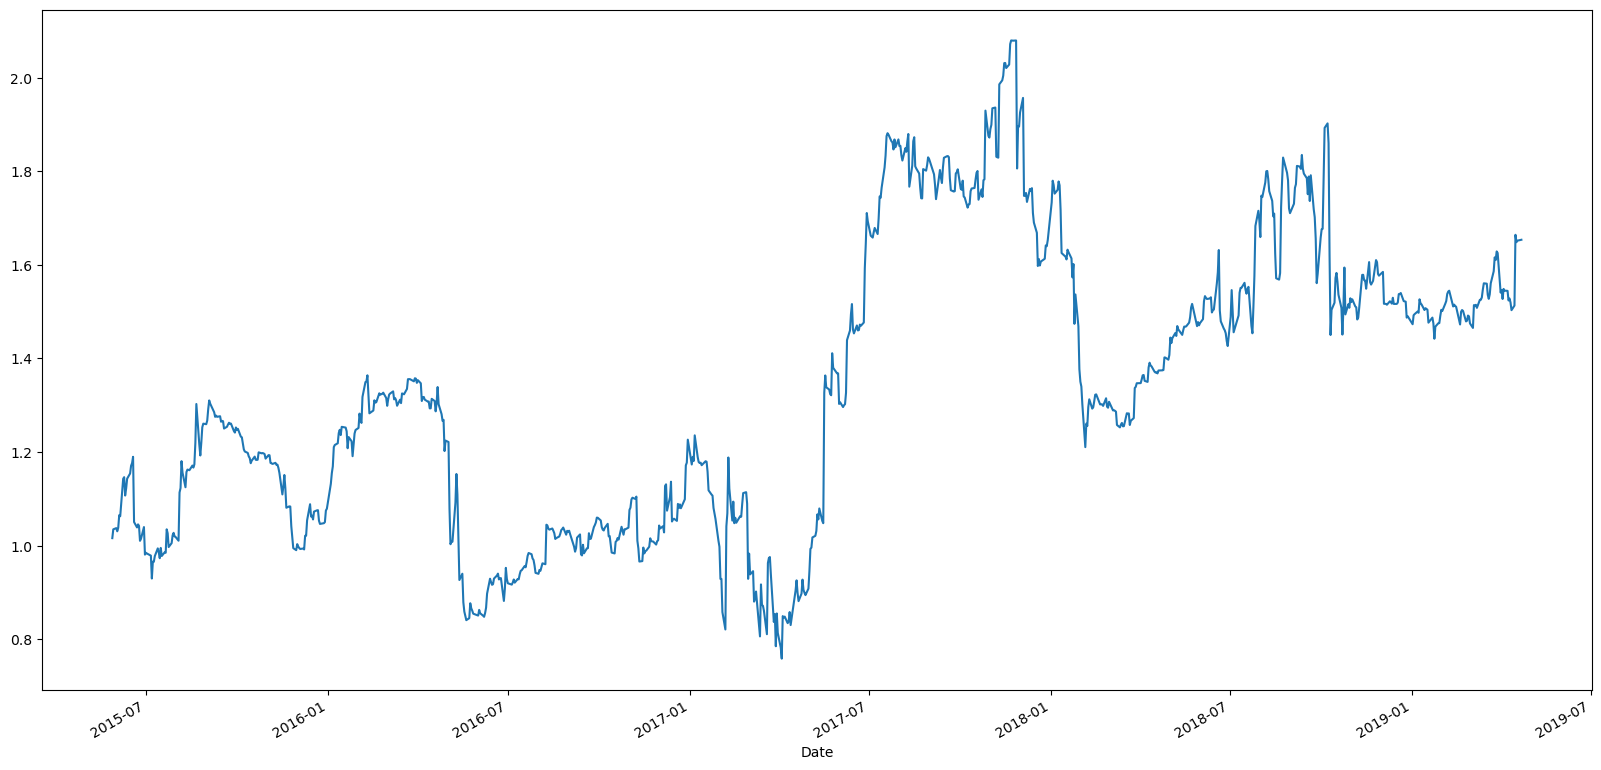

In [60]:
# Calculate and plot Beta
new_covariance = df_ret['bryant_fund'].rolling(window=60).cov(df_ret['sp500'])
new_variance = df_ret['sp500'].rolling(window=60).var()
df_ret_rolling_beta = new_covariance / new_variance
df_ret_rolling_beta.plot(figsize=(20,10));

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualized Sharpe Ratios
(df_ret.mean() * 252) / (df_ret.std() * np.sqrt(252))
df_ret_annualized_sharpe_ratio = (df_ret.mean() * 252) / (df_ret.std() * np.sqrt(252))
df_ret_annualized_sharpe_ratio

sp500                          0.641630
Algo 1                         1.374206
Algo 2                         0.486307
SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
bryant_fund                    1.272473
dtype: float64

<Axes: >

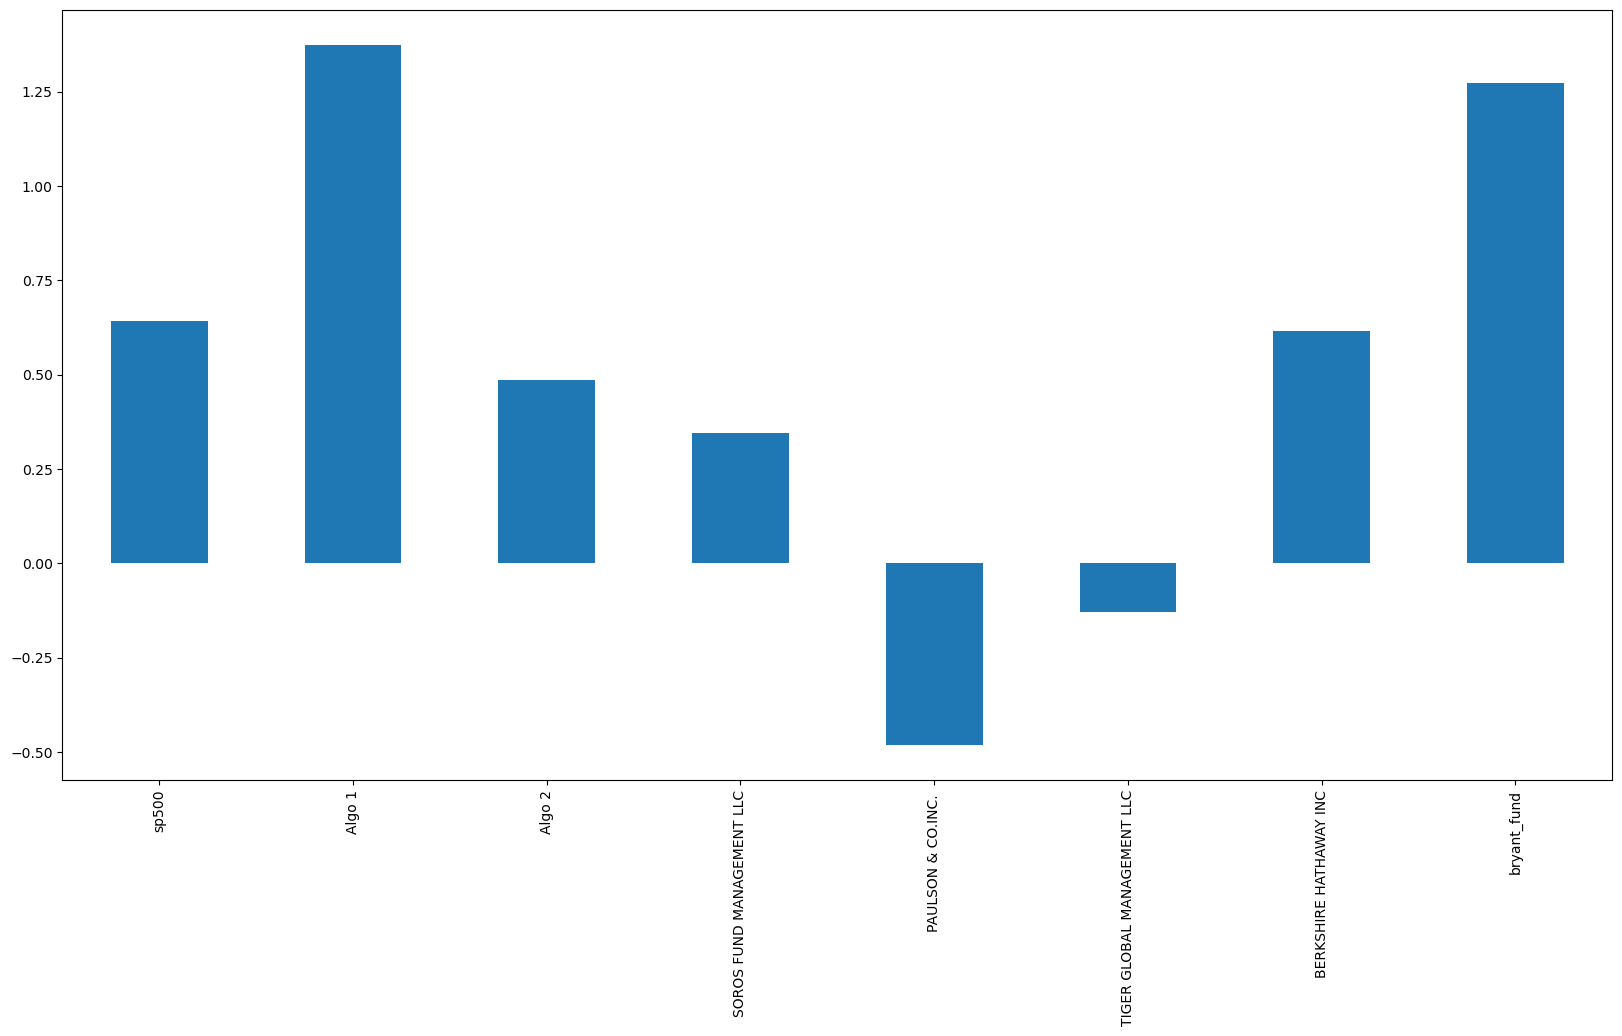

In [70]:
# Visualize the sharpe ratios as a bar plot
df_ret_annualized_sharpe_ratio.plot.bar(figsize=(20,10))


### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio did really well. 